In [1]:
import os

import IPython.display as ipd
import keras
import librosa
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import tensorflow as tf

from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D, Reshape

In [2]:
# File path to each directory
train_path_real = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/life things/data science/data/for-2seconds/training/real/'
train_path_fake = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/life things/data science/data/for-2seconds/training/fake/'

test_path_real = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/life things/data science/data/for-2seconds/testing/real/'
test_path_fake = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/life things/data science/data/for-2seconds/testing/fake/'

validation_path_real = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/life things/data science/data/for-2seconds/validation/real/'
validation_path_fake = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/life things/data science/data/for-2seconds/validation/fake/'

In [3]:
# Make lists of filepaths for each audio file in each directory
train_real_audio = [os.path.join(train_path_real, file) for file in os.listdir(train_path_real) if file.endswith('.wav')]
train_fake_audio = [os.path.join(train_path_fake, file) for file in os.listdir(train_path_fake) if file.endswith('.wav')]

validation_real_audio = [os.path.join(validation_path_real, file) for file in os.listdir(validation_path_real) if file.endswith('.wav')]
validation_fake_audio = [os.path.join(validation_path_fake, file) for file in os.listdir(validation_path_fake) if file.endswith('.wav')]

test_real_audio = [os.path.join(test_path_real, file) for file in os.listdir(test_path_real) if file.endswith('.wav')]
test_fake_audio = [os.path.join(test_path_fake, file) for file in os.listdir(test_path_fake) if file.endswith('.wav')]

In [8]:
# Making sure the lists work
random_audio_file = train_real_audio[random.randint(0, len(train_real_audio))]
ipd.Audio(random_audio_file)

In [9]:
random_audio_file = train_fake_audio[random.randint(0, len(train_fake_audio))]
ipd.Audio(random_audio_file)

In [11]:
random_audio_file = test_real_audio[random.randint(0, len(test_real_audio))]
ipd.Audio(random_audio_file)

In [12]:
random_audio_file = test_fake_audio[random.randint(0, len(test_fake_audio))]
ipd.Audio(random_audio_file)

In [13]:
random_audio_file = validation_real_audio[random.randint(0, len(validation_real_audio))]
ipd.Audio(random_audio_file)

In [14]:
random_audio_file = validation_fake_audio[random.randint(0, len(validation_fake_audio))]
ipd.Audio(random_audio_file)

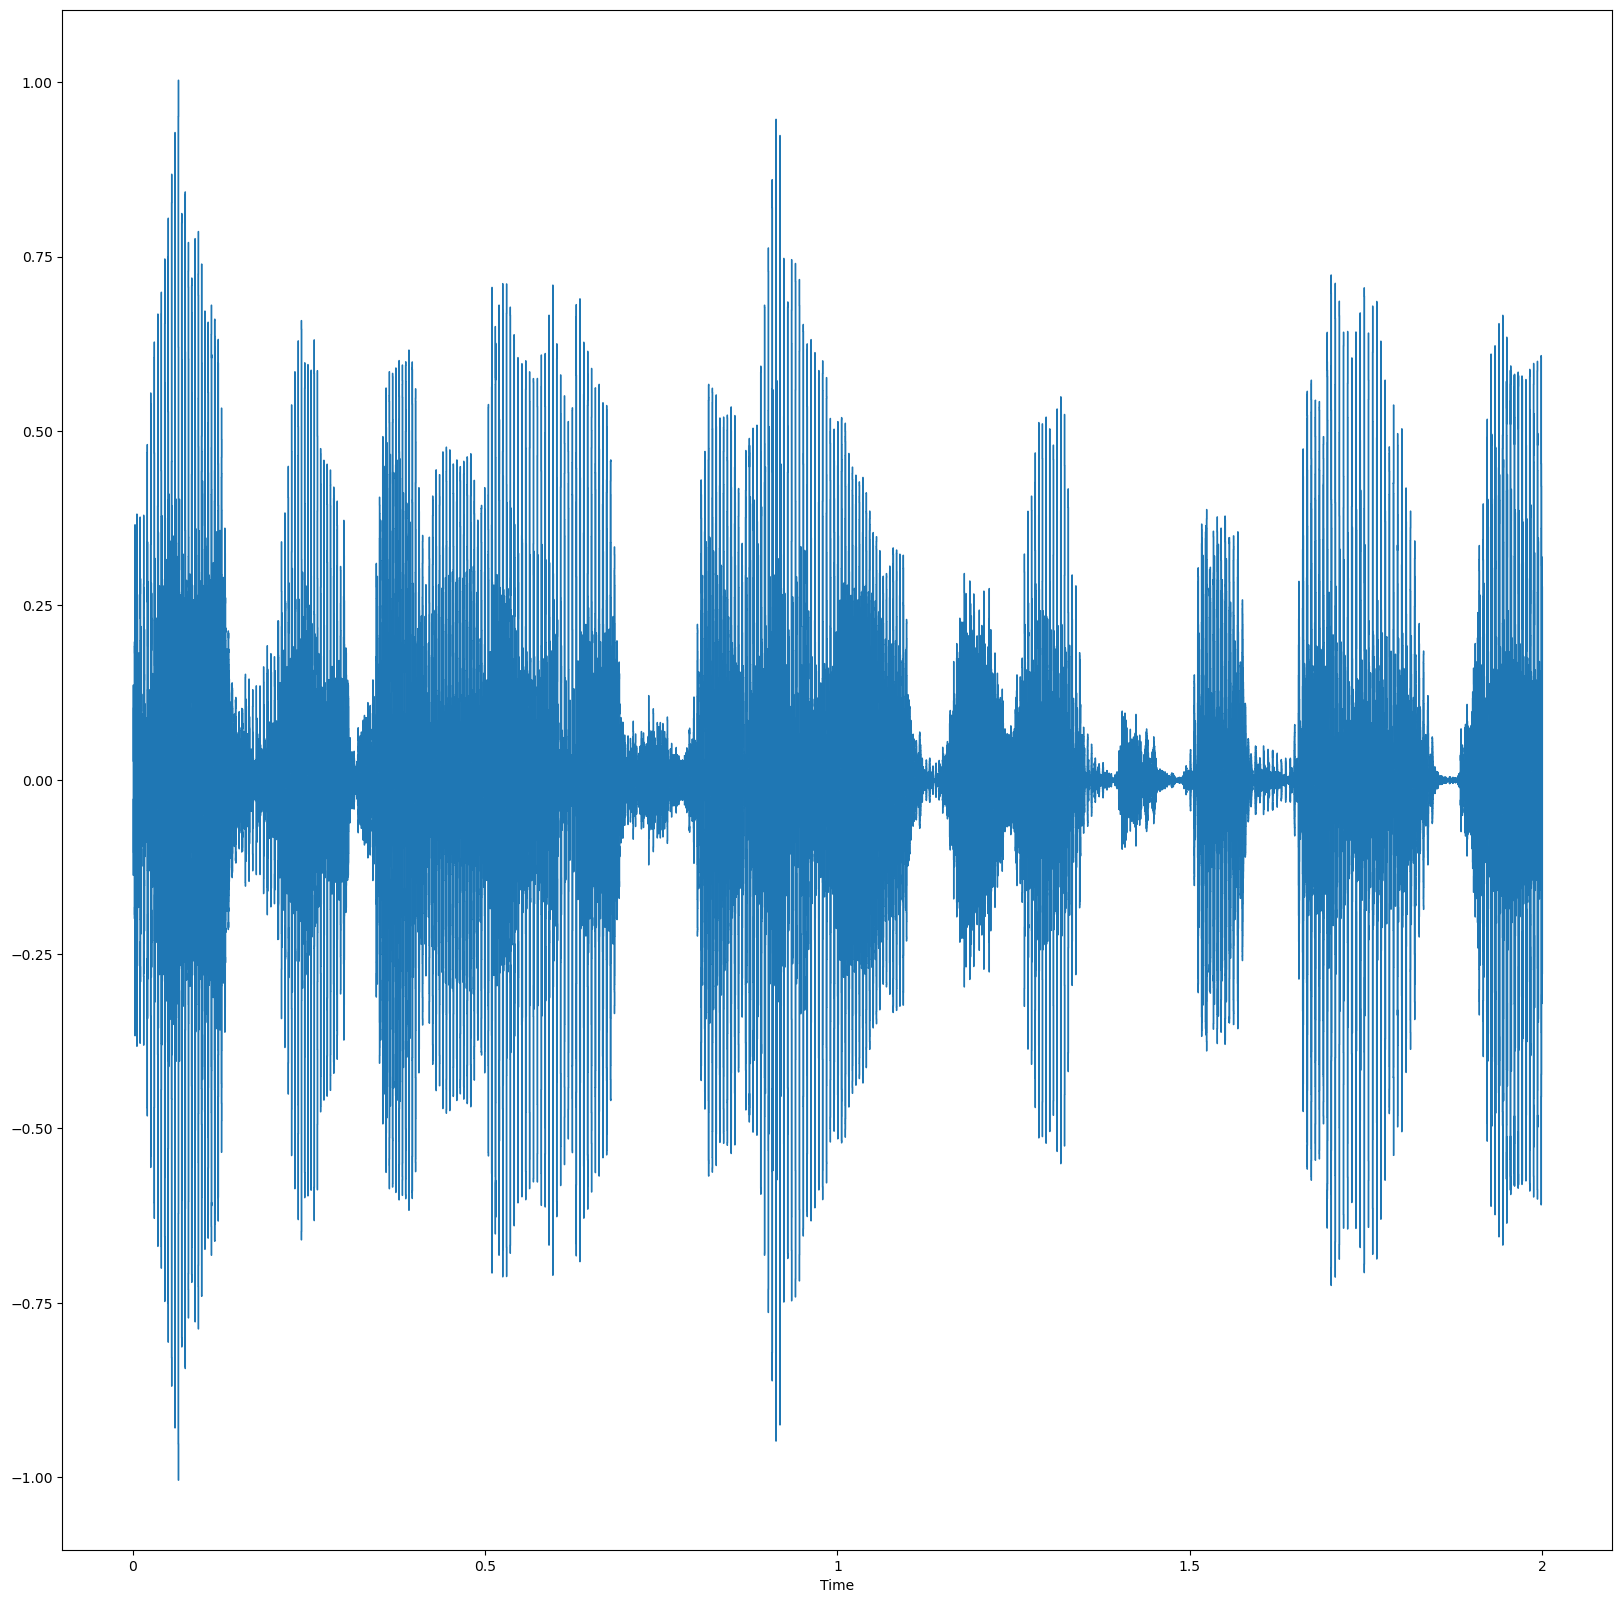

In [15]:
# Visualize the wafeforms using Librosa
x, sr = librosa.load(random_audio_file)
plt.figure(figsize=(20,20))
librosa.display.waveshow(x, sr=sr)

In [16]:
# Convert audio file to mel-scale spectrogram

def convert_to_melscale_spectrogram(file_path):
    x, sr = librosa.load(file_path)
    mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=sr)
    mel_db_spect = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return mel_db_spect

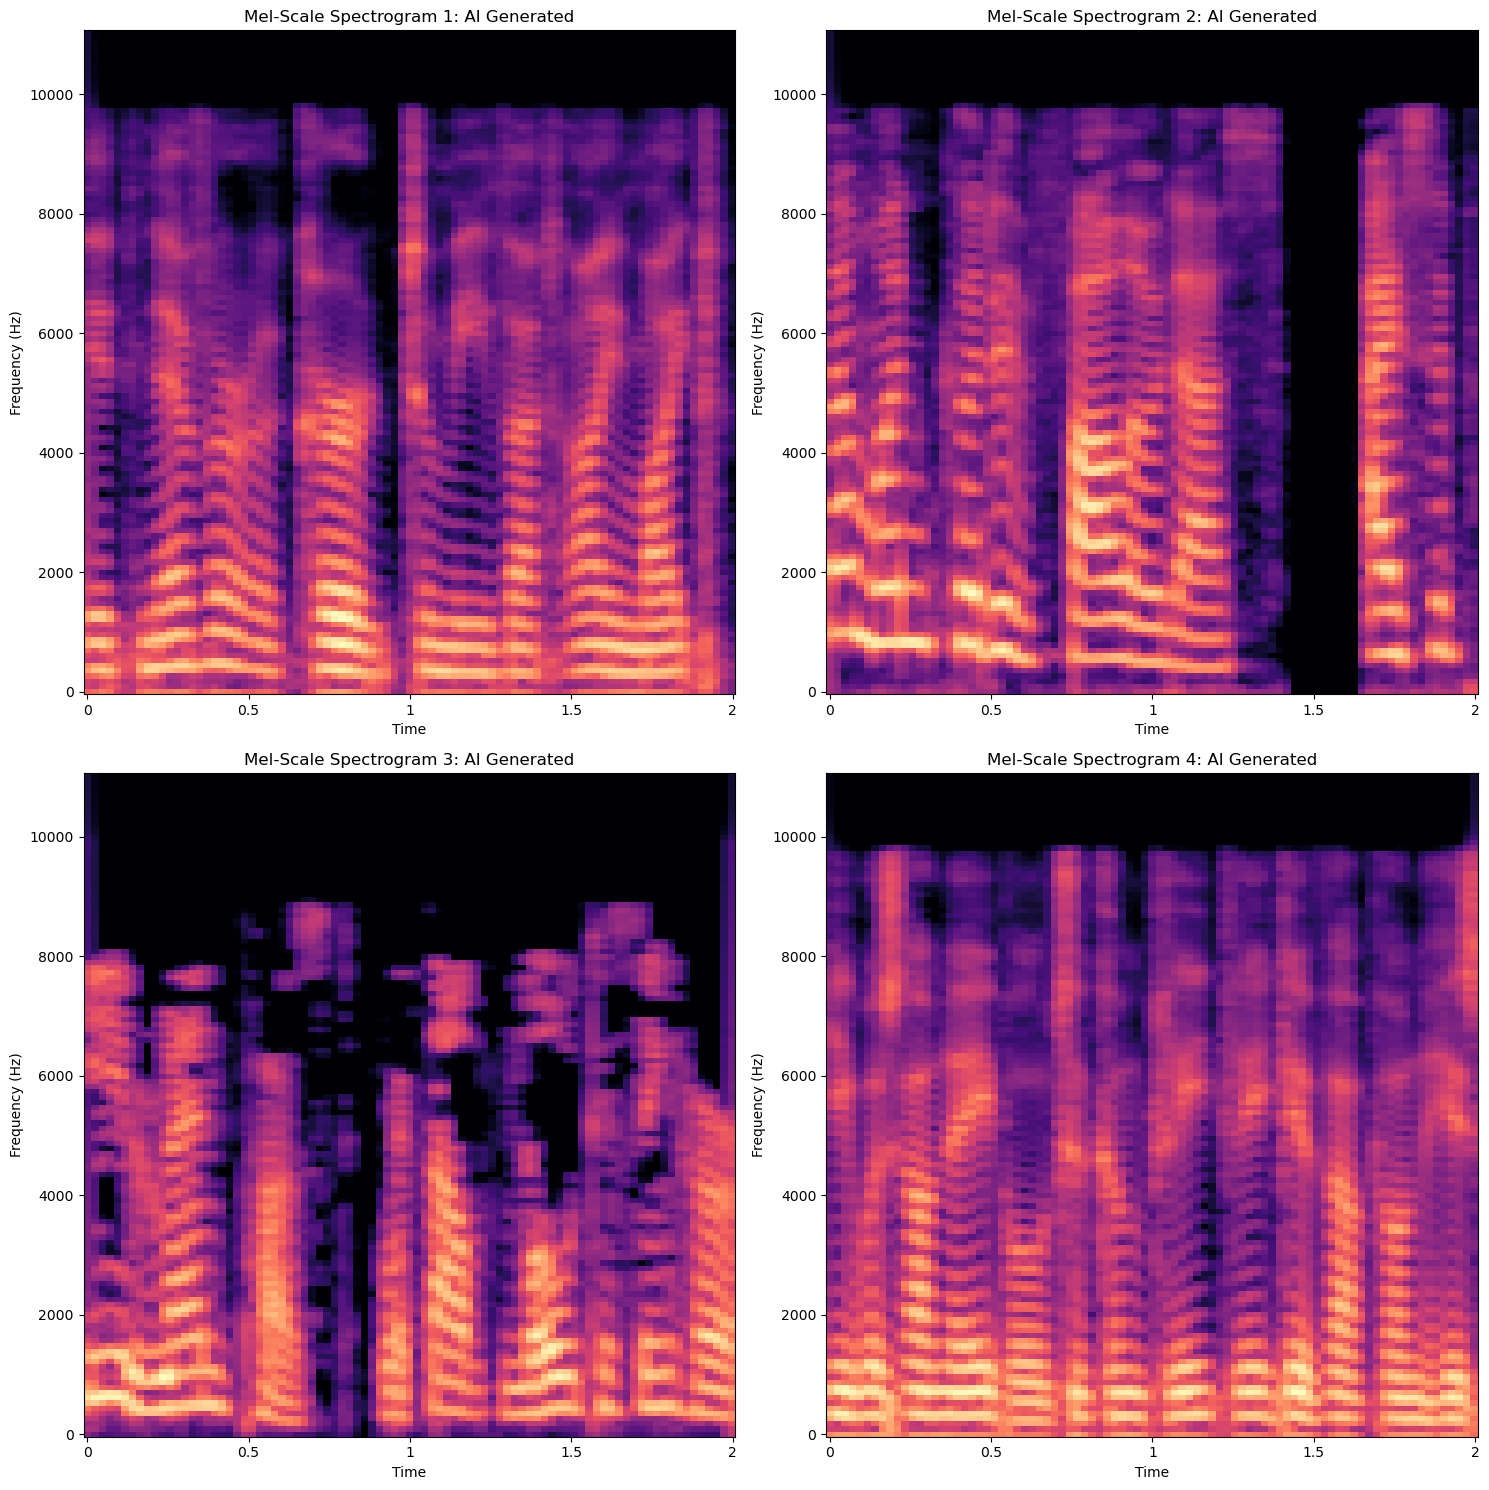

In [29]:
# testing convert_to_melscale_spectrogram() function with audio file above

fig, axs = plt.subplots(2,2, figsize=(15,15))    
# Loop over the axes and plot a random spectrogram on each
for i, ax in enumerate(axs.flat):
    random_audio_file = validation_fake_audio[random.randint(0, len(validation_fake_audio))]
    test_spec = convert_to_melscale_spectrogram(random_audio_file)  # Get the spectrogram for the current file
    
    # Display the mel spectrogram on the current axis
    librosa.display.specshow(test_spec, x_axis='time', y_axis='hz', ax=ax)
    
    # Set the title and labels for the current subplot
    ax.set_title(f'Mel-Scale Spectrogram {i + 1}: AI Generated')
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency (Hz)')

# Automatically adjust the layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

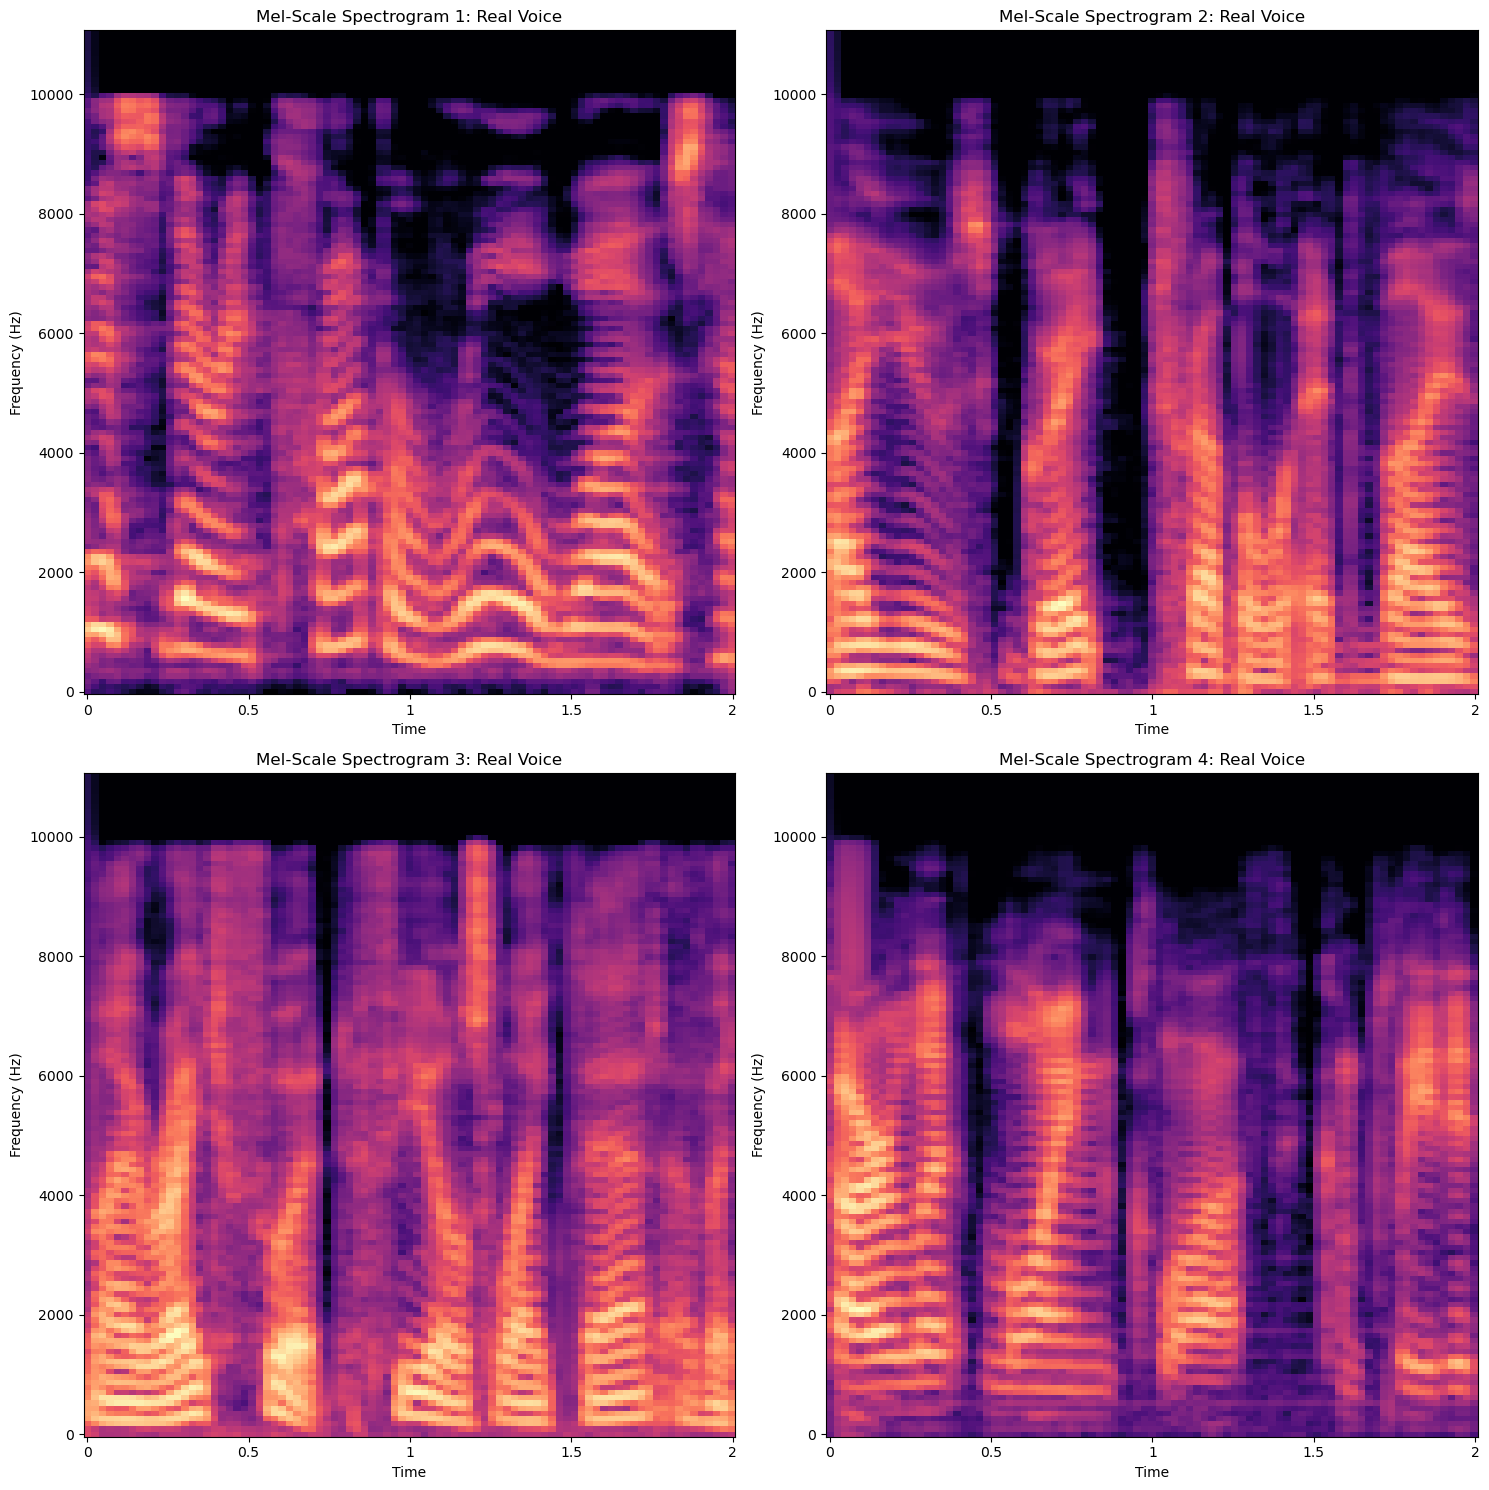

In [30]:
# Comparing AI generated mel-scale spectrogram to real spectrogram
fig, axs = plt.subplots(2,2, figsize=(15,15))    
# Loop over the axes and plot a random spectrogram on each
for i, ax in enumerate(axs.flat):
    random_audio_file = validation_real_audio[random.randint(0, len(validation_real_audio))]
    test_spec = convert_to_melscale_spectrogram(random_audio_file)  # Get the spectrogram for the current file
    
    # Display the mel spectrogram on the current axis
    librosa.display.specshow(test_spec, x_axis='time', y_axis='hz', ax=ax)
    
    # Set the title and labels for the current subplot
    ax.set_title(f'Mel-Scale Spectrogram {i + 1}: Real Voice')
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency (Hz)')

# Automatically adjust the layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

In [31]:
# Use spectrograms as features to train the model
def get_features_and_labels(real_audio_files, fake_audio_files):
    spec_arr = []
    labels = []
    
    for file in real_audio_files:
        spectrogram = convert_to_melscale_spectrogram(file)
        spec_arr.append(spectrogram)
        labels.append(0)
    for file in fake_audio_files:
        spectrogram = convert_to_melscale_spectrogram(file)
        spec_arr.append(spectrogram)
        labels.append(1)
    
    return np.array(spec_arr), np.array(labels)

train_features, train_labels = get_features_and_labels(train_real_audio, train_fake_audio)
validation_features, validation_labels = get_features_and_labels(validation_real_audio, validation_fake_audio)
test_features, test_labels = get_features_and_labels(test_real_audio, test_fake_audio)